## Description
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### Variables:
**Hours Studied**: The total number of hours spent studying by each student.

**Previous Scores**: The scores obtained by students in previous tests.

**Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).

**Sleep Hours**: The average number of hours of sleep the student had per day.

**Sample Question Papers Practiced**: The number of sample question papers the student practiced.

#### Target Variable:

**Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read dataset

In [3]:
df=pd.read_csv('Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


###  Encode Categorical Features

In [4]:
df['Extracurricular Activities']=df['Extracurricular Activities'].astype(str).map({'Yes':1, 'No':0})
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


### Define features and target

In [5]:
X_train=df.drop('Performance Index', axis=1).values
y_train=df['Performance Index'].values

### Define number of training example and features

In [6]:
m,n=X_train.shape
print(f"Number of training example m = {m}")
print(f"Number of features n = {n}")

Number of training example m = 10000
Number of features n = 5


### Define cost function

In [7]:
def compute_cost(X,y,w,b):
    cost=0.0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        cost+=(f_wb_i-y[i])**2
    
    cost/=(2*m)

    return(np.squeeze(cost))

### Compute Gradient

In [8]:
def compute_gradient(X,y,w,b):
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        err=f_wb_i-y[i]

        for j in range(n):
            dj_dw+=err*X[i,j]
        
        dj_db+=err
    
    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db

### Gradient descent

In [12]:
import copy

def gradient_descent(X,y,w_in,b_in,alpha,numiters):

    w=copy.deepcopy(w_in)
    b=b_in

    J_hist=[]

    for i in range(numiters):

        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<10000:
            J_hist.append(compute_cost(X,y,w,b))
        
        if i%(numiters/10)==0:
            print(f"Iteration {i:4d}.  Cost {J_hist[-1]}")

    return w,b,J_hist


### Initialize Parameters

In [19]:
w_in=np.zeros(n)
b_in=0
alpha=2.587*(1e-4)
numiters=15000 

w,b,J_hist=gradient_descent(X_train,y_train,w_in,b_in,alpha,numiters)

Iteration    0.  Cost 1703.7519295021325
Iteration 1500.  Cost 48.36760778826319
Iteration 3000.  Cost 37.67638773018142
Iteration 4500.  Cost 36.94565215223455
Iteration 6000.  Cost 36.296137661688284
Iteration 7500.  Cost 35.66748058139839
Iteration 9000.  Cost 35.05867313809462
Iteration 10500.  Cost 34.66390856712955
Iteration 12000.  Cost 34.66390856712955
Iteration 13500.  Cost 34.66390856712955


### Weight and bias

In [20]:
print(f"Weight: {w} Bias: {b}")

Weight: [0.71225123 0.71225123 0.71225123 0.71225123 0.71225123] Bias: -4.897254612870833


### Predict Student Performance

In [35]:
y_predict=np.zeros(m)

for i in range(m):
    y_predict[i]=np.dot(w,X_train[i])+b

### Result Evaluation

In [39]:
compare_df=pd.DataFrame({
    'Actual':y_train,
    'Predicted':y_predict
})

print(compare_df[:20])

    Actual  Predicted
0     91.0  78.436139
1     65.0  60.629858
2     45.0  44.248080
3     36.0  41.399075
4     66.0  62.766612
5     61.0  63.478863
6     63.0  60.629858
7     42.0  40.686824
8     61.0  60.629858
9     69.0  64.191115
10    84.0  72.025878
11    73.0  62.766612
12    27.0  38.550070
13    33.0  37.125568
14    68.0  65.615617
15    43.0  52.795095
16    67.0  62.054361
17    70.0  65.615617
18    30.0  44.960331
19    63.0  57.068602


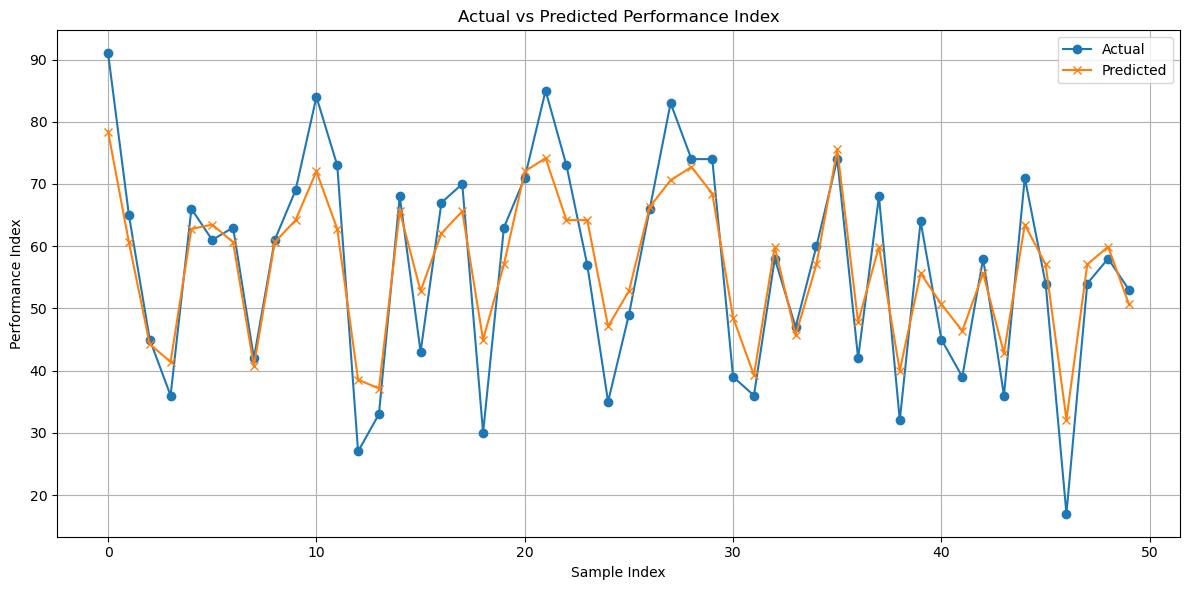

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(y_train[:50], label='Actual', marker='o')
plt.plot(y_predict[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Performance metrics for this model

#### R² Score (Coefficient of Determination)

% of variance explained by model (best = 1.0)

$R^2 = 1 - \frac{SSres}{SStot}$

- $SSres = \sum\limits_{i=0}^{m-1} (y^i - \hat{y}^i)^2$ = Residual Sum of Squares (error of your model)
- $SStot = \sum\limits_{i=0}^{m-1} (y^i - \bar{y})^2$ = Total Sum of Squares (error of simply using the mean)
- $y^i$ = Actual value
- $\hat{y}^i$ = Predicted value
- $\bar{y}$ = Mean of actual values
- m = Number of training example

In [40]:
y_target=np.array(y_train)
y_predict=np.array(y_predict)

ymean=np.mean(y_target)

ss_res=np.sum((y_target-y_predict)**2)
ss_tot=np.sum((y_target-ymean)**2)

r2=1-(ss_res/ss_tot)

print(r2)


0.8222090377419389


We can say the model is a good fit

#### RMSE: Root Mean Squared Error
$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=0}^{m-1} (y_i - \hat{y}_i)^2 }
$$

Where:
- $y^i$ = actual value  
- $\hat{y}^i$ = predicted value  
- m = number of samples

In [49]:
sum_of_sq_error=np.sum((y_target-y_predict)**2)
mean_sq_error=sum_of_sq_error/m

rmse=np.sqrt(mean_sq_error)

print(rmse)

8.10062096204373


#### MAE (Mean Absolute Error)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


In [51]:
sum_of_abs_error=np.sum(np.abs(y_target-y_predict))

mae=sum_of_abs_error/m

print(mae)

6.5908211305062


In [58]:
rng=max(y_target)-min(y_target)
print(f"The range width is {rng}")

The range width is 90.0


The range width is 90 (100 - 10).

An RMSE of 8.10 means the typical prediction error is about 8 units, which is roughly 9% of the full target range.

MAE 6.59 means predictions are, on average, 6.59 units away from the actual values.

That’s quite a moderate error — not terrible, but not super accurate either.

**Improve RMSE and MAE**: Feature scaling and feature engineering might help.